# Lab Course Machine Learning
# Exercise Sheet 4
November 29th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 0: Dataset preprocessing

In [21]:
import numpy as np
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.rcParams['figure.figsize'] = (10 ,8)
from sympy import symbols, diff
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('tic-tac-toe.data',sep = ',',header=None,names=["top-left-square", "top-middle-square", "top-right-square", "middle-left-square","middle-middle-square", "middle-right-square", "bottom-left-square", "bottom-middle-square","bottom-right-square","Class"])
valueMap = {'negative':0,'positive':1,'x':2,'o':3,'b':4}
df= df.replace(valueMap)
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,2,2,2,2,3,3,2,3,3,1
1,2,2,2,2,3,3,3,2,3,1
2,2,2,2,2,3,3,3,3,2,1
3,2,2,2,2,3,3,3,4,4,1
4,2,2,2,2,3,3,4,3,4,1
...,...,...,...,...,...,...,...,...,...,...
953,3,2,2,2,3,3,3,2,2,0
954,3,2,3,2,2,3,2,3,2,0
955,3,2,3,2,3,2,2,3,2,0
956,3,2,3,3,2,2,2,3,2,0


In [23]:
(df['Class'].value_counts()) / len(df) * 100

1    65.344468
0    34.655532
Name: Class, dtype: float64

This show  that instances of positive class(represented by 1) are more in dataset than negative class(represented by 0). This is unbalanced dataset for which we need stratification technique to make the proportionality equal in dataset.

Now for stratification , I am taking fraction from positive class while taking the whole negative class to make this proportionality equal.

In [24]:
fraction = ((df.loc[df['Class'] == 0]).shape[0])/((df.loc[df['Class'] == 1]).shape[0])
td1 = df.loc[df['Class'] == 1].sample(frac=fraction)
td2 = df.loc[df['Class'] == 0]
td = pd.concat([td1,td2]).sample(frac=1)
td.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
294,2,4,4,4,2,4,3,3,2,1
689,2,3,2,4,3,4,4,3,2,0
738,2,4,4,3,3,3,4,2,2,0
525,4,2,4,4,2,4,3,2,3,1
617,4,4,3,3,4,4,2,2,2,1


Spliting dataset into training and test

In [25]:
td_train = td.iloc[0:math.floor(len(td)*0.8)]
td_test = td.iloc[math.floor(len(td)*0.8)+1:]


In [26]:
td_train

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
294,2,4,4,4,2,4,3,3,2,1
689,2,3,2,4,3,4,4,3,2,0
738,2,4,4,3,3,3,4,2,2,0
525,4,2,4,4,2,4,3,2,3,1
617,4,4,3,3,4,4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...
215,2,3,4,3,4,3,2,2,2,1
105,2,2,4,3,2,3,3,2,4,1
797,3,2,4,3,4,2,3,2,4,0
632,2,2,3,2,3,3,3,4,2,0


In [27]:
td_test

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
37,2,2,2,3,4,3,2,3,4,1
570,4,3,3,2,4,3,2,2,2,1
40,2,2,2,3,4,3,3,4,2,1
4,2,2,2,2,3,3,4,3,4,1
583,4,3,4,3,2,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...
138,2,3,2,4,2,3,3,4,2,1
620,4,4,4,2,2,2,3,3,4,1
199,2,3,4,2,3,4,2,2,3,1
682,2,3,2,3,3,3,4,2,2,0


## Exercise 1: Logistic Regression with Gradient Descent

In [56]:
def sig(X,B):
    return (1  / (1 + np.exp((-1)*(np.dot(X,B)))))


def logLike(X,Y,B):
    return np.sum((Y*sig(X,B))-np.log(1+np.exp(sig(X,B))))
# for logloss: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
# ref given in exercise was not running
def logloss(yHat, y):
    sum=0
    for i in range(len(yHat)):
        if y[i] == 1:
            sum = sum - np.log(yHat[i] ) 
        else:
            sum = sum -np.log(1 - yHat[i] ) 
    return sum

def GradAscent(X,Y,µ,e,xtest,ytest):
    B_old = np.zeros(shape=(len(X[0]),1))
    fold_min_fnew_List =[]
    numberIterations = 10000
    L= logLike(X,Y,B_old)
    Log_loss = []
    for i in range (numberIterations):
        y_hat = sig(X,B_old)
        y_test_hat = sig(xtest,B_old)
        Log_loss.append(logloss(y_test_hat,ytest))
        B_hat =B_old +(µ* np.dot(X.T,(Y-y_hat)))
        fold_min_fnew_List.append(abs(logLike(X,Y,B_old)-logLike(X,Y,B_hat)))
        L_old = L
        #print(L_old)
        L = logLike(X,Y,B_hat)
        B_old = B_hat
        
#         if(L - L_old<e):
#             return B_hat,fold__min_fnew_List
    return B_hat,fold_min_fnew_List,Log_loss
    return ('Not Converge'),[]
def stepLengthBolddriver(X,Y,µ_old,µ_plus,µ_minus,xtest,ytest):
    B_old = np.zeros(shape=(len(X[0]),1))
    µ =µ_old *µ_plus
    y_hat = sig(X,B_old)
   
    B_hat =B_old +(µ* np.dot(X.T,(Y-y_hat)))
    i= 0
    fold_min_fnew_List = []
    rmse_List = []
    L = logLike(X,Y,B_old)
    Log_loss = []
    numberIterations = 1000
    for i in range (numberIterations):
        y_hat = sig(X,B_old)
        y_test_hat = sig(xtest,B_old)
        Log_loss.append(logloss(y_test_hat,ytest))
        B_hat =B_old +(µ* np.dot(X.T,(Y-y_hat)))
        fold_min_fnew_List.append(abs(logLike(X,Y,B_old)-logLike(X,Y,B_hat)))
        L_old = L
        
        L = logLike(X,Y,B_hat)
        B_old = B_hat
        µ = µ*µ_minus   
        i += 1
    return B_hat,fold_min_fnew_List,µ,Log_loss






In [48]:
X_train = td_train.loc[:, td_train.columns != 'Class'] # taking all columns except Class columns for X
Y_train = td_train[['Class']] # taking Class column for y

X = X_train.to_numpy() # converting to numpy matrix
Y = Y_train.to_numpy() # converting to numpy matrix
bias_column = np.ones(shape=(len(X_train),1)) 
X = np.append(bias_column,X,axis=1) #adding bias columns to X
µ=10**-9

print(X.shape)
print(Y.shape)
X_test = (td_test.loc[:, td_test.columns != 'Class']).to_numpy() # taking all columns except Class columns for X
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (td_test[['Class']]).to_numpy() # taking Class column for y

(531, 10)
(531, 1)


In [49]:
B_hat,fold__min_fnew_List,Log_loss=GradAscent(X,Y,µ,10**(-2),X_test,Y_test)
fold__min_fnew_List
B_hat

array([[-2.40388278e-05],
       [-2.17260959e-04],
       [ 1.32667784e-04],
       [-2.07224681e-04],
       [ 1.32626318e-04],
       [-4.02232159e-04],
       [ 1.32643677e-04],
       [-1.47261239e-04],
       [ 9.76789278e-05],
       [-3.72728350e-05]])

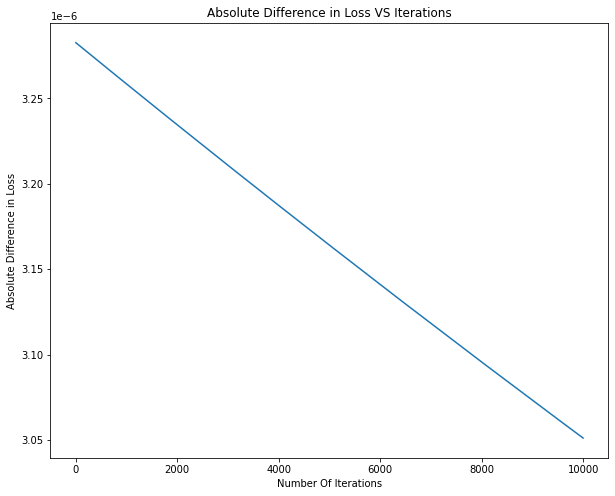

In [53]:
fold__min_fnew_List
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in likelihood')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

Graph shows with number of iterations, difference of likelihood decreases.

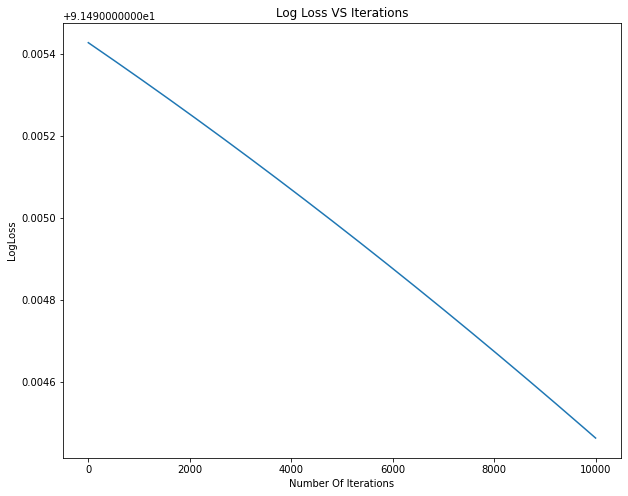

In [54]:

plt.plot(Log_loss)
plt.xlabel('Number Of Iterations')
plt.ylabel('LogLoss')
plt.title ('Log Loss VS Iterations')
plt.show()


LogLoss decreeases with increase in iterations

### bolddriver

In [88]:
µ=10**-11
B_hat,fold__min_fnew_List,µ,Log_loss=stepLengthBolddriver(X,Y,µ,1,0.95,X_test,Y_test)

In [89]:
B_hat

array([[-4.99999613e-10],
       [-4.39999890e-09],
       [ 2.60000107e-09],
       [-4.19999888e-09],
       [ 2.60000106e-09],
       [-8.09999889e-09],
       [ 2.60000106e-09],
       [-2.99999890e-09],
       [ 1.90000108e-09],
       [-7.99998903e-10]])

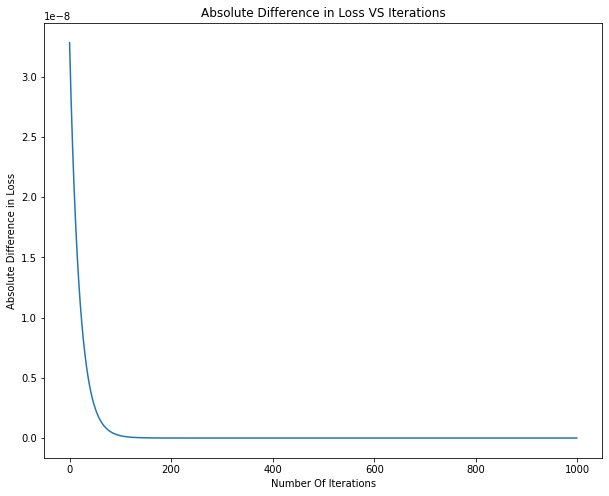

In [90]:

plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in likelihood')
plt.title ('Absolute Difference in likelihood VS Iterations')
plt.show()

With µ calculated with bolddriver, the absolute difference btw likelihood decreases quickly and after 150 iterations converges to zero.

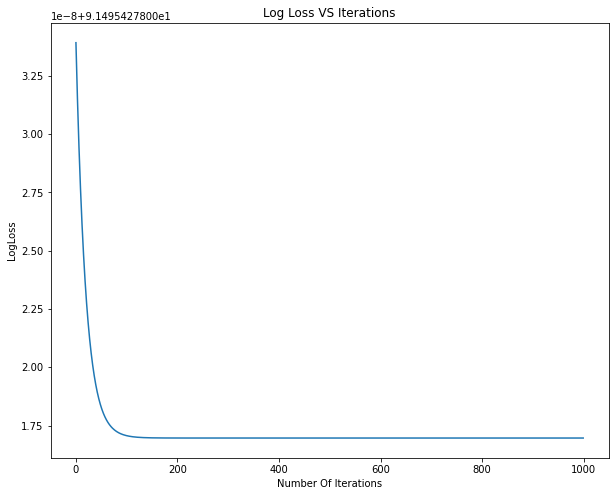

In [91]:
fold__min_fnew_List
plt.plot(Log_loss)
plt.xlabel('Number Of Iterations')
plt.ylabel('LogLoss')
plt.title ('Log Loss VS Iterations')
plt.show()

With µ calculated with bolddriver, the logloss decreases quickly and after 150 iterations converges to zero.

## Exercise 2: Implement Newton Algorithm for Logistic Regression

In [104]:
def Hessian (X,B):
    ones = np.ones(shape=(len(X),1))
    f = ones-sig(X,B)
    W= np.diag((np.multiply(f,ones-f)).reshape(-1))
    H=np.dot(X.T,np.dot(W, X), )
    
    return H

def minimize_newton(X,Y,µ,e,xtest,ytest):
    B_old = np.zeros(shape=(len(X[0]),1))
    fold__min_fnew_List =[]
    H=Hessian(X,B_old)
    numberIterations = 1000
    L_old = logLike(X,Y,B_old)
    Log_loss=[]
    for i in range (numberIterations):
        y_hat = sig(X,B_old)
        y_test_hat = sig(xtest,B_old)
        Log_loss.append(logloss(y_test_hat,ytest))  
        B_hat =B_old +(µ* np.dot(np.linalg.inv(H),(np.dot(X.T,(Y-y_hat)))))
        L = logLike(X,Y,B_hat)
        B_old = B_hat
        fold__min_fnew_List.append(L - L_old)
#         if((L - L_old)<e):
#             return B_hat,fold__min_fnew_List
        L_old = L
    return B_hat,fold__min_fnew_List,Log_loss
    return ('Not Converge'),[]

In [105]:
µ=10**-7
B_hat,fold__min_fnew_List,Log_loss=minimize_newton(X,Y,µ,10**(-2),X_test,Y_test)
B_hat

array([[-1.15503258e-05],
       [-1.79860933e-05],
       [ 2.52814967e-05],
       [-1.54552357e-05],
       [ 2.41481081e-05],
       [-4.77291411e-05],
       [ 2.03925760e-05],
       [-8.77538549e-06],
       [ 1.82521246e-05],
       [ 3.20211246e-06]])

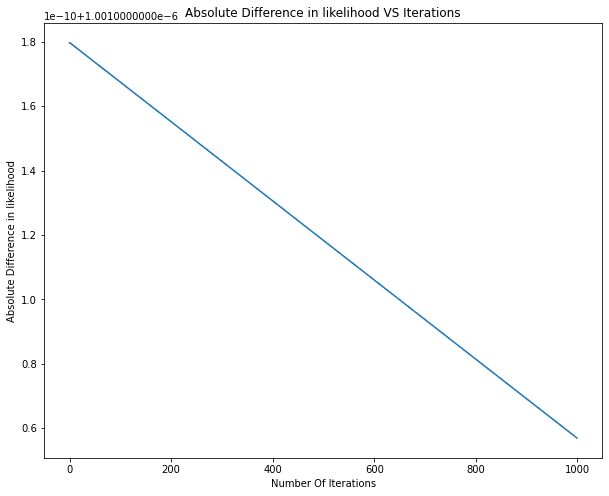

In [106]:

plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in likelihood')
plt.title ('Absolute Difference in likelihood VS Iterations')
plt.show()

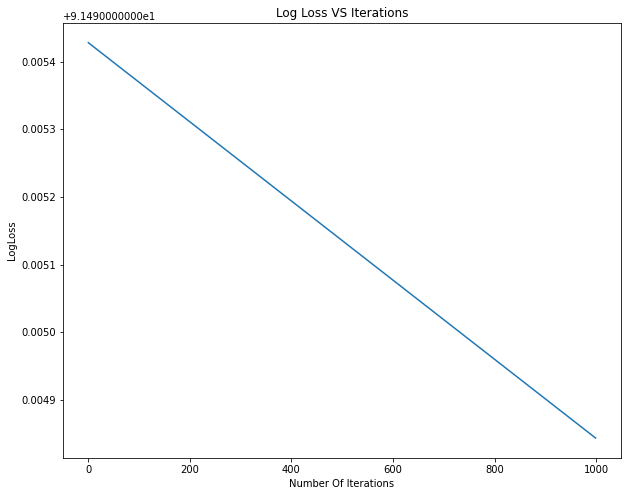

In [107]:
plt.plot(Log_loss)
plt.xlabel('Number Of Iterations')
plt.ylabel('LogLoss')
plt.title ('Log Loss VS Iterations')
plt.show()

logloss is decreases with number of iterations, it means it prediction is more accurate after each iteration.